<a href="https://colab.research.google.com/github/xainasx/PREDICTION-OF-HEART-DISEASE-USING-MACHINE-LEARNING-ALGORITHMS/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names'
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
heart_dataset = pd.read_csv(data_url,sep= ',', names = columns)

In [ ]:
# infromation of the data
print(heart_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


In [ ]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
# Separate numeric and categorical variables for visualization purposes
CATEGORICAL_COLS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thalach', 'ca']
NUMERICAL_COLS = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

heart_categorical_data = heart_dataset[CATEGORICAL_COLS]
heart_numerical_data = heart_dataset[NUMERICAL_COLS]

heart_categorical_data.nunique()

sex         2
cp          4
fbs         2
restecg     3
exang       2
slope       3
thalach    91
ca          5
dtype: int64

In [ ]:
print(heart_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


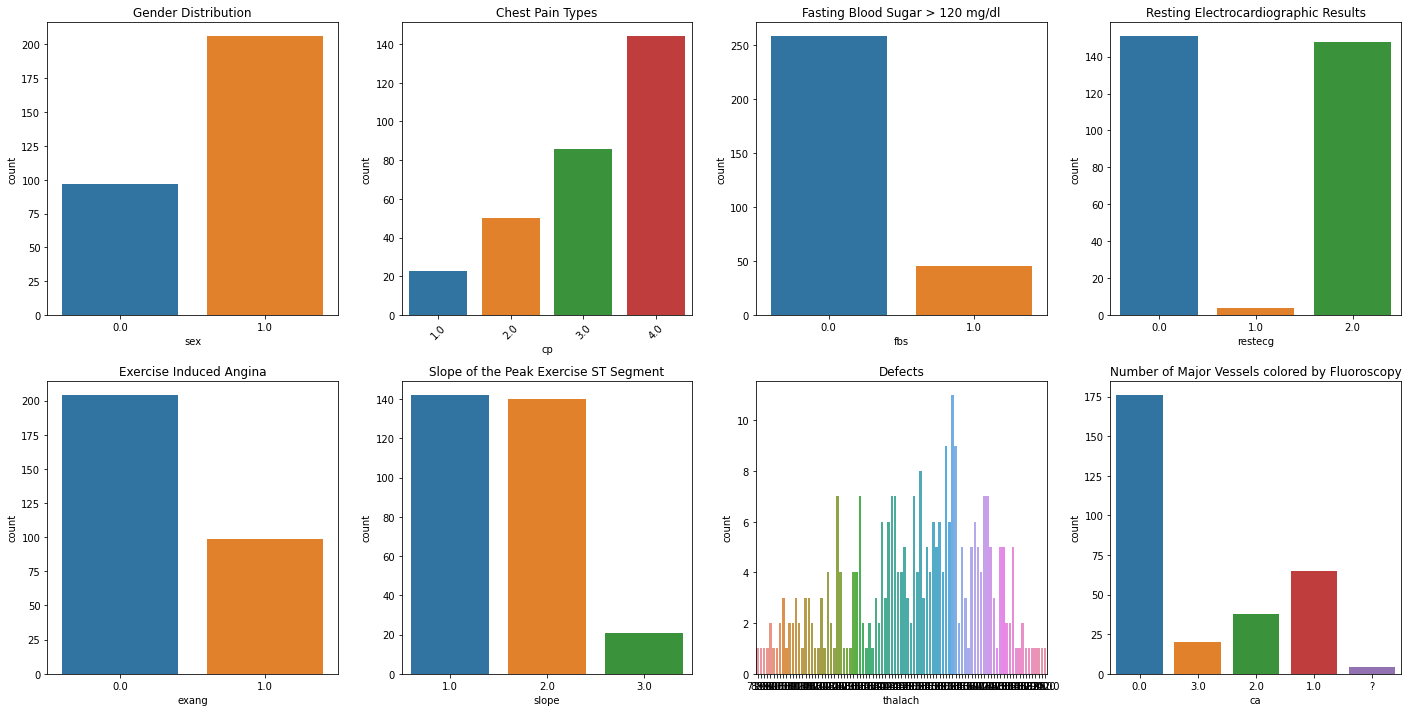

In [ ]:
# Visualize the distribution of categorical variables
fig, axes = plt.subplots(2, 4, figsize=(20,10))

sns.countplot(x='sex', data=heart_categorical_data, ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')

sns.countplot(x='cp', data=heart_categorical_data, ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Chest Pain Types')

sns.countplot(x='fbs', data=heart_categorical_data, ax=axes[0,2])
axes[0,2].set_title('Fasting Blood Sugar > 120 mg/dl')

sns.countplot(x='restecg', data=heart_categorical_data, ax=axes[0,3])
axes[0,3].set_title('Resting Electrocardiographic Results')

sns.countplot(x='exang', data=heart_categorical_data, ax=axes[1,0])
axes[1,0].set_title('Exercise Induced Angina')

sns.countplot(x='slope', data=heart_categorical_data, ax=axes[1,1])
axes[1,1].set_title('Slope of the Peak Exercise ST Segment')

sns.countplot(x='thalach', data=heart_categorical_data, ax=axes[1,2])
axes[1,2].set_title('Defects')

sns.countplot(x='ca', data=heart_categorical_data, ax=axes[1,3])
axes[1,3].set_title('Number of Major Vessels colored by Fluoroscopy')
plt.tight_layout()
plt.show()

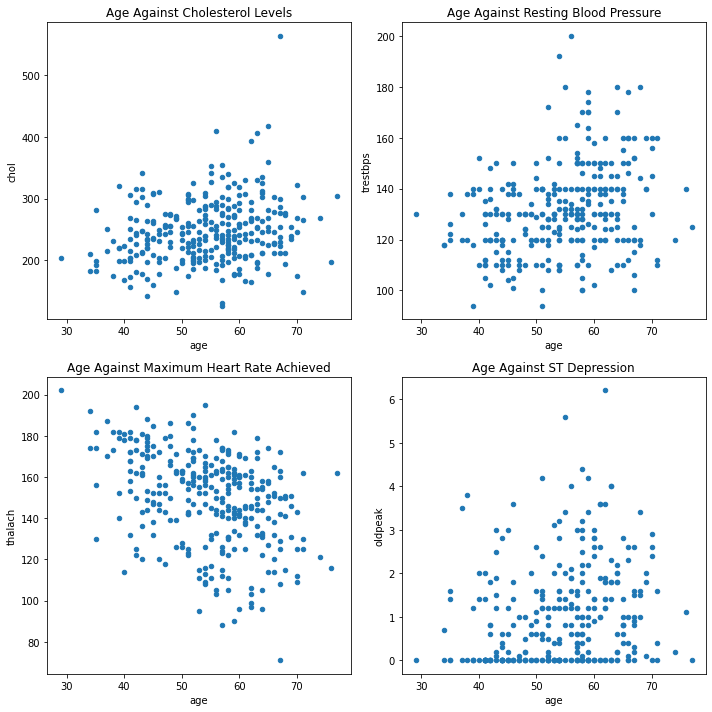

In [ ]:
# Use scatterplots to visualize key relationships in numerical data
fig, axes = plt.subplots(2, 2, figsize=(10,10))

heart_numerical_data.plot('age', 'chol', kind='scatter', ax=axes[0,0])
axes[0,0].set_title('Age Against Cholesterol Levels')

heart_numerical_data.plot('age', 'trestbps', kind='scatter', ax=axes[0,1])
axes[0,1].set_title('Age Against Resting Blood Pressure')

heart_numerical_data.plot('age', 'thalach', kind='scatter', ax=axes[1,0])
axes[1,0].set_title('Age Against Maximum Heart Rate Achieved')

heart_numerical_data.plot('age', 'oldpeak', kind='scatter', ax=axes[1,1])
axes[1,1].set_title('Age Against ST Depression')

plt.tight_layout()
plt.show()

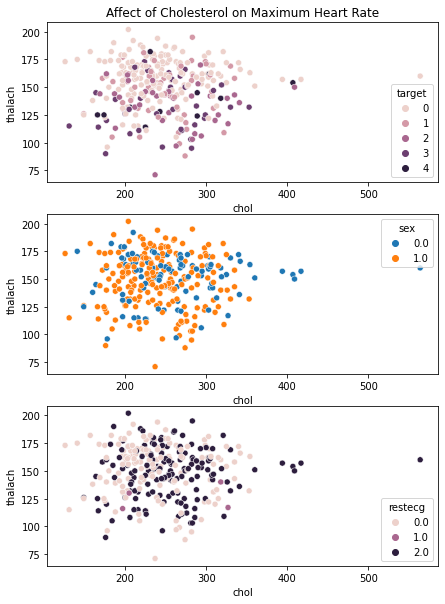

In [ ]:
fig, axes = plt.subplots(3, figsize=(7,10))

sns.scatterplot(x='chol', y='thalach', hue='target', data=heart_dataset, ax=axes[0])
axes[0].set_title('Affect of Cholesterol on Maximum Heart Rate')

sns.scatterplot(x='chol', y='thalach', hue='sex', data=heart_dataset, ax=axes[1])

sns.scatterplot(x='chol', y='thalach', hue='restecg', data=heart_dataset, ax=axes[2])
plt.show()


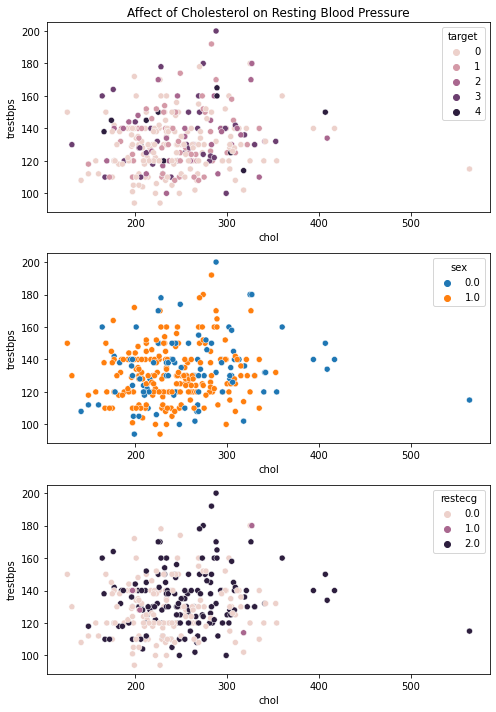

In [ ]:
fig, axes = plt.subplots(3, figsize=(7,10))

axes[0].set_title('Affect of Cholesterol on Resting Blood Pressure')
sns.scatterplot(x='chol', y='trestbps', hue='target', data=heart_dataset, ax=axes[0])
sns.scatterplot(x='chol', y='trestbps', hue='sex', data=heart_dataset, ax=axes[1])
sns.scatterplot(x='chol', y='trestbps', hue='restecg', data=heart_dataset, ax=axes[2])

plt.tight_layout()
plt.show()

In [ ]:
heart_dataset.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
target,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537
1,55.381818,0.836364,3.345455,133.254545,249.109091,0.072727,1.163636,145.927273,0.454545,1.005455,1.636364
2,58.027778,0.805556,3.750000,134.194444,259.277778,0.250000,0.916667,135.583333,0.611111,1.780556,1.888889
3,56.000000,0.800000,3.771429,135.457143,246.457143,0.228571,1.285714,132.057143,0.657143,1.962857,1.971429
4,59.692308,0.846154,3.692308,138.769231,253.384615,0.076923,1.615385,140.615385,0.461538,2.361538,2.076923


In [ ]:
print('Average Cholesterol Level Based on Target Variable and Chest Pain Type')
print(pd.crosstab(index=heart_dataset.target, columns=heart_dataset.cp, values=heart_dataset.chol, aggfunc=np.mean))
print('\n')

print('Average Cholesterol Level Based on Target Variable and Patient Gender')
print(pd.crosstab(index=heart_dataset.target, columns=heart_dataset.sex, values=heart_dataset.chol, aggfunc=np.mean))
print('\n')

print('Average Cholesterol Level Based on Target Variable and Cardiographic Results')
print(pd.crosstab(index=heart_dataset.target, columns=heart_dataset.restecg, values=heart_dataset.chol, aggfunc=np.mean))

Average Cholesterol Level Based on Target Variable and Chest Pain Type
cp          1.0         2.0         3.0         4.0
target                                             
0       229.875  240.682927  245.279412  245.333333
1       262.200  254.166667  236.222222  249.685714
2       234.000  246.000000  247.750000  262.100000
3           NaN  300.000000  238.750000  243.827586
4       231.000         NaN  230.000000  257.545455


Average Cholesterol Level Based on Target Variable and Patient Gender
sex            0.0         1.0
target                        
0       256.750000  231.597826
1       264.222222  246.152174
2       309.142857  247.241379
3       247.142857  246.285714
4       316.000000  242.000000


Average Cholesterol Level Based on Target Variable and Cardiographic Results
restecg         0.0    1.0         2.0
target                                
0        234.242105  197.0  255.044118
1        248.956522    NaN  249.218750
2        242.947368  327.0  274.437500
3 

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
target    0.222853  0.224469  0.407075  0.157754  0.070909  0.059186   

           restecg   thalach     exang   oldpeak     slope    t

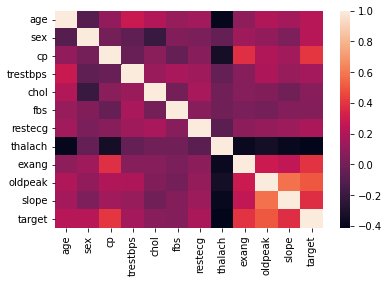

In [ ]:
# Display correlation matrix and heatmap
corr = heart_dataset.corr()
print(corr)

sns.heatmap(corr)
plt.show()

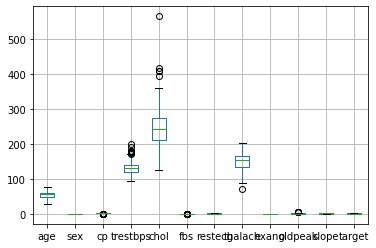

In [ ]:
# Display boxplot to visualize outliers in the data

heart_dataset.boxplot()
plt.show()

In [ ]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
# Cholesterol Levels
median_chol = heart_dataset.loc[heart_dataset['chol']!=0, 'chol'].median()
heart_df = heart_dataset.fillna(value={'chol': median_chol})
heart_df.loc[heart_df['chol']==0, 'chol'] = median_chol

In [ ]:
# Resting Blood Pressure
mean_bp = heart_df.loc[heart_df['trestbps']!=0,'trestbps'].mean()
heart_df = heart_df.fillna(value={'trestbps': mean_bp})
heart_df.loc[heart_df['trestbps']==0, 'trestbps'] = mean_bp

# Maximum Heart Rate
mean_hr = heart_df.loc[heart_df['thalach']!=0,'thalach'].mean()
heart_df = heart_df.fillna(value={'thalach': mean_hr})
heart_df.loc[heart_df['thalach']==0, 'thalach'] = mean_hr

# Old Peak
mean_peak = heart_df.oldpeak.mean()
heart_df = heart_df.fillna(value={'oldpeak': mean_peak})
heart_df.loc[heart_df['oldpeak']==0, 'oldpeak'] = mean_peak

# Drop columns with a great number of missing values and reassign datatypes

heart_df.drop(labels=['ca','thal','slope'], axis=1, inplace=True)
heart_df = heart_df.astype({'sex':'category', 'cp':'category', 'fbs':'bool', 'restecg':'category', 'exang':'bool'})



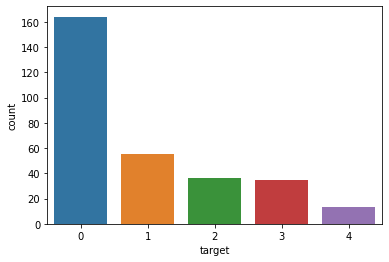

In [ ]:
# Drop remaining rows with missing values and display distribution for target variables

heart_df.dropna(inplace=True)
sns.countplot('target', data=heart_df)
plt.show()


In [ ]:
print('Shape of Dataset:',heart_dataset.shape)
print('Number of rows:',heart_dataset.shape[0])
print('Number of columns : ',heart_dataset.shape[1])

Shape of Dataset: (303, 14)
Number of rows: 303
Number of columns :  14


In [ ]:
# checking for null value
#raw_data.isnull().sum()
# seems like there are no null values in the dataset
print("is there any null value :",heart_dataset.isnull().values.any())

is there any null value : False


In [ ]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
heart_dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [ ]:
# lets change the heart disease types 1to 4 to 1
heart_dataset.loc[heart_dataset['target'] > 0 , 'target'] =1

# lets catergories the age into
# 1: young age (29-40) ,
# 2: middle age (40-55) , and
# 3: oldage(<50)
heart_dataset.loc[(heart_dataset.age >= 29) & (heart_dataset.age < 40), 'age'] = 1
heart_dataset.loc[(heart_dataset.age >= 40) & (heart_dataset.age < 55) , 'age'] = 2
heart_dataset.loc[(heart_dataset.age >= 55) , 'age'] = 3

# convert to number
heart_dataset.ca = pd.to_numeric(heart_dataset.ca,errors='coerce').fillna(0)
heart_dataset.thal = pd.to_numeric(heart_dataset.thal,errors='coerce').fillna(0)
#raw_data.describe()

In [ ]:
heart_dataset.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
219,3.0,1.0,4.0,138.0,271.0,0.0,2.0,182.0,0.0,0.0,1.0,0.0,3.0,0
253,2.0,0.0,3.0,120.0,295.0,0.0,2.0,157.0,0.0,0.6,1.0,0.0,3.0,0
230,2.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0,0
157,3.0,1.0,4.0,125.0,300.0,0.0,2.0,171.0,0.0,0.0,1.0,2.0,7.0,1
133,2.0,1.0,4.0,140.0,261.0,0.0,2.0,186.0,1.0,0.0,1.0,0.0,3.0,0
99,2.0,1.0,4.0,122.0,222.0,0.0,2.0,186.0,0.0,0.0,1.0,0.0,3.0,0
206,3.0,1.0,4.0,128.0,259.0,0.0,2.0,130.0,1.0,3.0,2.0,2.0,7.0,1
48,3.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0
45,3.0,1.0,3.0,112.0,230.0,0.0,2.0,165.0,0.0,2.5,2.0,1.0,7.0,1
233,3.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0


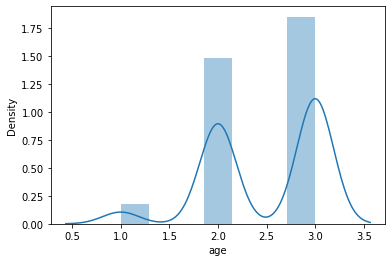

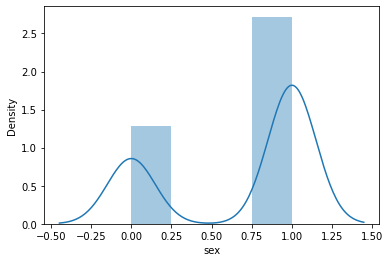

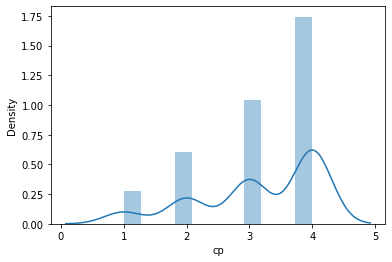

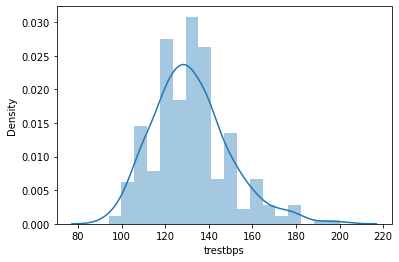

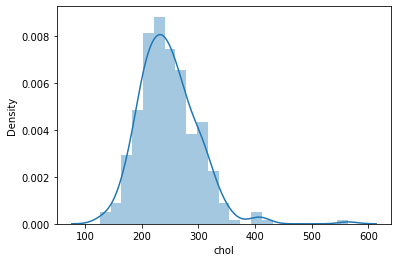

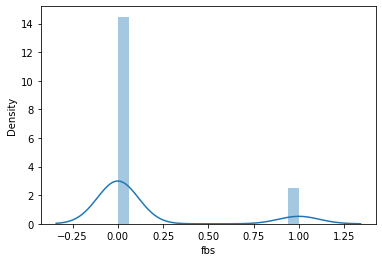

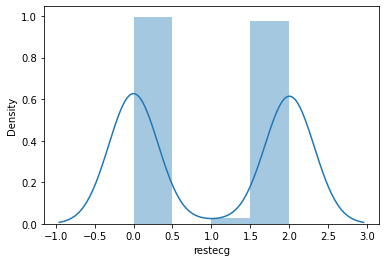

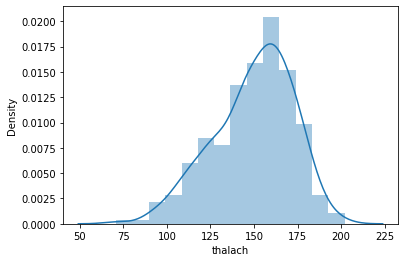

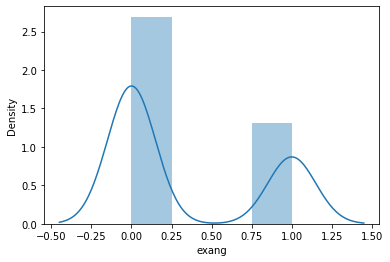

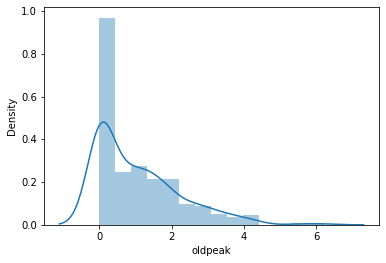

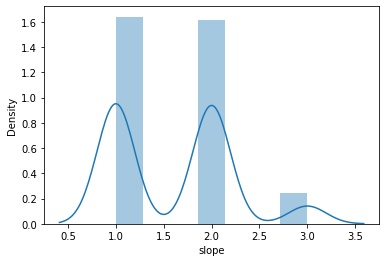

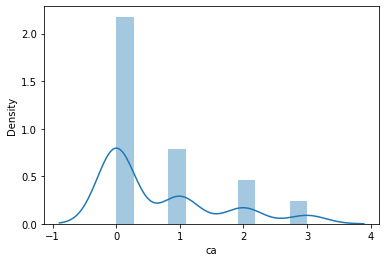

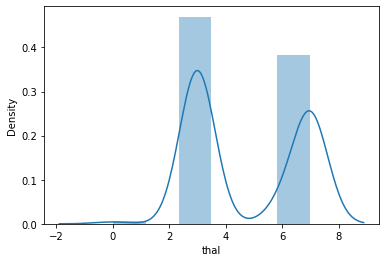

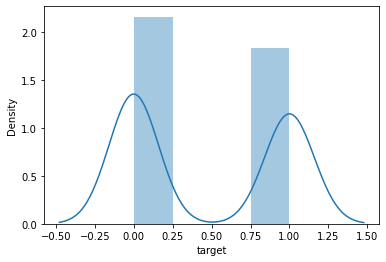

In [ ]:
for feature in columns:
    #if feature not in ['thal','ca']:
    sns.distplot(heart_dataset[feature])
    plt.show()

In [ ]:
# correlation values between the features
heart_dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.066873,0.105149,0.290151,0.200447,0.101635,0.148772,-0.358376,0.126623,0.226940,0.189950,0.310492,0.190534,0.274652
sex,-0.066873,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.378155,0.276816
cp,0.105149,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.254161,0.414446
trestbps,0.290151,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134311,0.150825
chol,0.200447,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.025190,0.085164
fbs,0.101635,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.053608,0.025264
restecg,0.148772,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.023822,0.169202
thalach,-0.358376,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.263384,-0.417167
exang,0.126623,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.316134,0.431894
oldpeak,0.226940,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.341416,0.424510


In [ ]:
# drop trestbps(.16),chol(.071),fbs(0.059),restecg(.18),thalach(-0.42)
newdf = heart_dataset.drop(columns = ['trestbps','chol','fbs','restecg','thalach'])
#newdf.head()

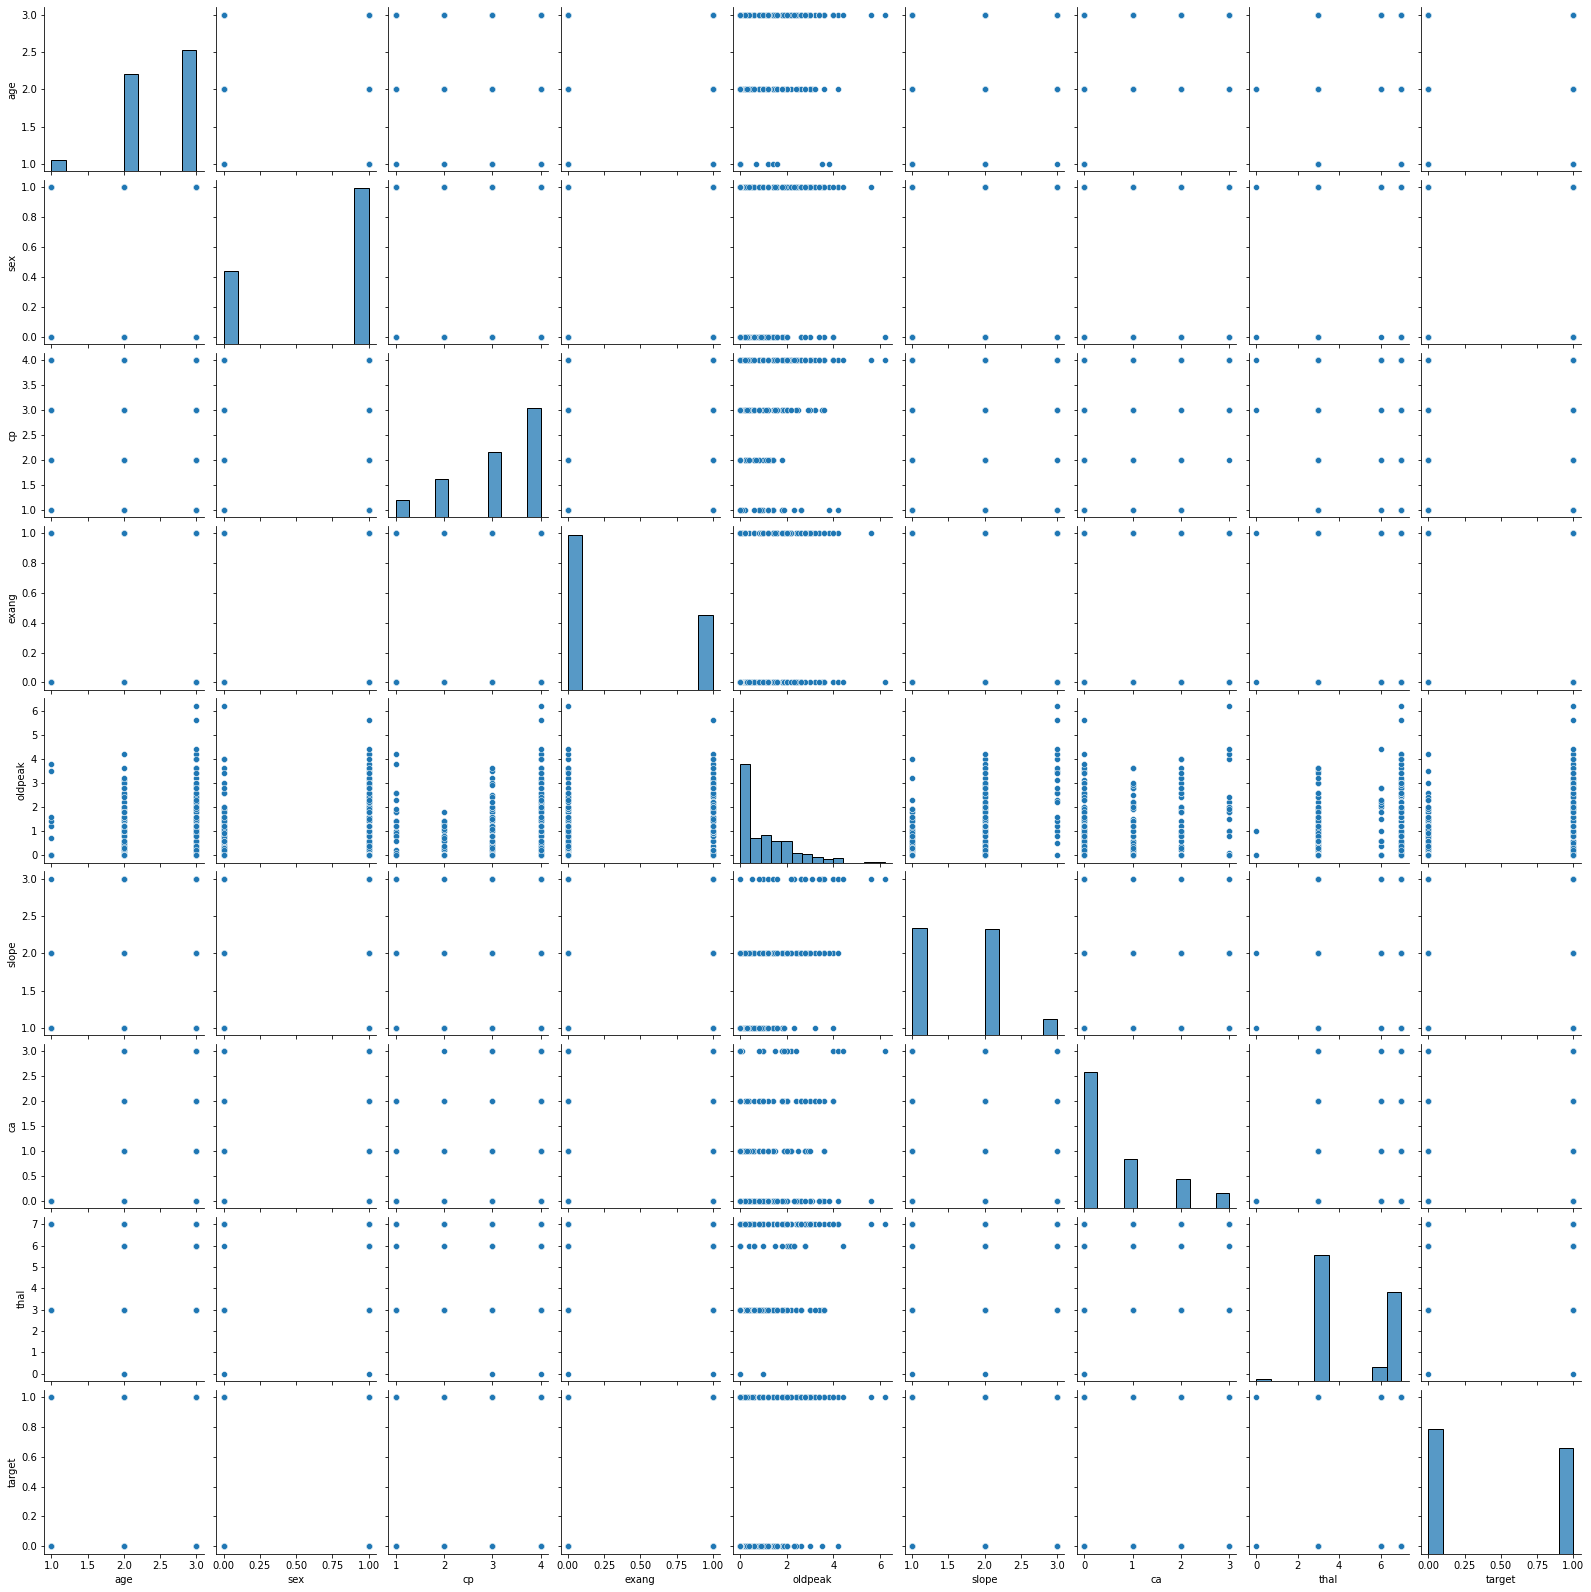

In [ ]:
#sns.pairplot(newdf, hue= 'age')
sns.pairplot(newdf)
plt.show()

In [ ]:
# modeling
# drop the target data choose
data_X = heart_dataset.drop('target',axis=1)
data_Y = heart_dataset['target']
from sklearn.preprocessing import StandardScaler #To scale data
from sklearn.model_selection import cross_val_score,train_test_split #To tarin and split data
from sklearn.metrics import confusion_matrix,classification_report


# normalize data
normal_data_X = (data_X - np.min(data_X)) / (np.max(data_X) - np.min(data_X)).values #normalisation equa

train_X,test_X,train_y,test_y =train_test_split(normal_data_X,data_Y,random_state=0,test_size=0.2)
print('test_X',test_X.shape)

test_X (61, 13)


In [ ]:
from sklearn.decomposition import PCA   #princple comp analysis- To reduce the data
pca=PCA().fit(train_X)
print(pca.explained_variance_ratio_)
print(train_X.columns.values.tolist())
print(pca.components_)

[0.23948669 0.18095821 0.148276   0.10131366 0.07719096 0.07102898
 0.05623428 0.04363592 0.03120215 0.0177812  0.01315252 0.01175835
 0.00798108]
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
[[ 0.18247683  0.27260896  0.29122216  0.04680707  0.02299082  0.07651618
   0.32687716 -0.14809992  0.66717329  0.16899054  0.25159949  0.22736377
   0.28556111]
 [ 0.124161   -0.51519807 -0.0086188   0.05824768  0.05792551 -0.00878855
   0.80289537 -0.0051793  -0.16444556 -0.00304637  0.01043205  0.06762466
  -0.18935147]
 [ 0.13144622 -0.75482471  0.21111072  0.02313625  0.02598176 -0.08069849
  -0.45721615 -0.09285041  0.34285512  0.06027822  0.12716044  0.03661804
  -0.0656481 ]
 [ 0.27378414 -0.05299141 -0.09136026  0.12361132  0.01115305  0.80254366
  -0.14669569 -0.04319199 -0.27773167  0.07953712  0.13302368  0.35052646
   0.08364614]
 [-0.3252124  -0.07466788 -0.17604902  0.00367993 -0.02875877  0.53905441
   0.10108034 

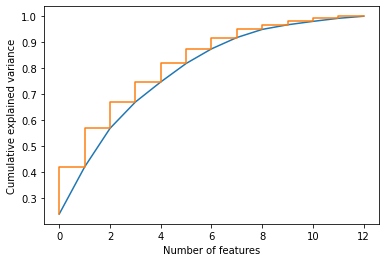

In [ ]:
cumulative_data = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_data)
plt.step([i for i in range(len(cumulative_data))],cumulative_data)
plt.xlabel('Number of features')
plt.ylabel('Cumulative explained variance')
plt.show()

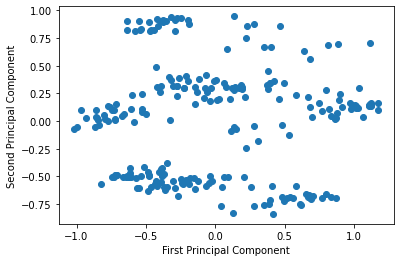

In [ ]:
pca = PCA(n_components=4)
pca.fit(train_X)
reduced_train_data = pca.transform(train_X)

plt.scatter(reduced_train_data[:, 0], reduced_train_data[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
# we will store the accuracies of various models
accuracies =  {}
# Support Vector Classifier
from sklearn import svm
svm_model = svm.SVC(C=1,kernel='poly',gamma='auto')
svm_model.fit(train_X, train_y)
svm_prediction = svm_model.predict(test_X)
svm_accuracy = svm_model.score(test_X,test_y)
accuracies['SVC'] = svm_accuracy
print("Testing Accuracty of SVM Model : ",svm_accuracy)

Testing Accuracty of SVM Model :  0.819672131147541


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(train_X, train_y)
dtc_prediction = dtc_model.predict(test_X)
dtc_accuracy = dtc_model.score(test_X,test_y)
accuracies['DecisionTreeClassifier'] = dtc_accuracy
print("Testing Accuracty of DecisionTreeClassifier Model : ",dtc_accuracy)

Testing Accuracty of DecisionTreeClassifier Model :  0.7377049180327869


In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf_model.fit(train_X, train_y)
rf_prediction = rf_model.predict(test_X)
rf_accuracy = rf_model.score(test_X,test_y)
accuracies['RandomForestClassifier'] = rf_accuracy
print("Testing Accuracty of RandomForestClassifier Model : ",rf_accuracy)

Testing Accuracty of RandomForestClassifier Model :  0.7540983606557377


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(train_X, train_y)
lr_prediction = lr_model.predict(test_X)
lr_accuracy = lr_model.score(test_X,test_y)
accuracies['LogisticRegression'] = lr_accuracy
print("Testing Accuracty of RandomForestClassifier Model : ",lr_accuracy)

Testing Accuracty of RandomForestClassifier Model :  0.819672131147541


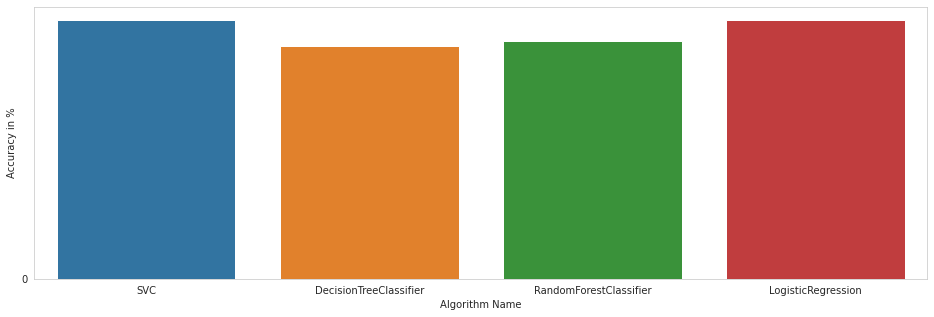

In [ ]:
# we will plot accuracy plots of algorithms
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy in %")
plt.xlabel("Algorithm Name")
sns.barplot(y=list(accuracies.values()),x=list(accuracies.keys()))
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(test_y,svm_prediction)
cm_dtc = confusion_matrix(test_y,dtc_prediction)
cm_rf  = confusion_matrix(test_y,rf_prediction)
cm_lr  = confusion_matrix(test_y,lr_prediction)

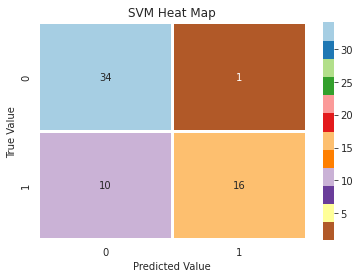

In [ ]:
sns.heatmap(cm_svm, annot=True, cmap="Paired_r", linewidth=2, linecolor='w', fmt='.0f')
plt.title('SVM Heat Map')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

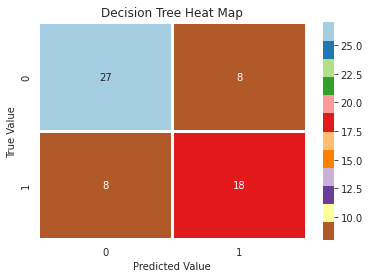

In [ ]:
sns.heatmap(cm_dtc, annot=True, cmap="Paired_r", linewidth=2, linecolor='w', fmt='.0f')
plt.title('Decision Tree Heat Map')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

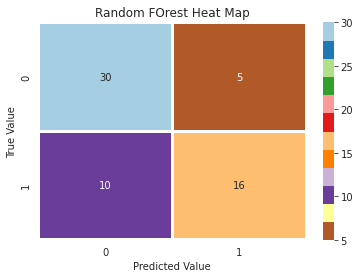

In [ ]:
sns.heatmap(cm_rf, annot=True, cmap="Paired_r", linewidth=2, linecolor='w', fmt='.0f')
plt.title('Random FOrest Heat Map')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

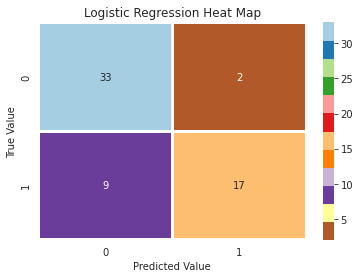

In [ ]:
sns.heatmap(cm_lr, annot=True, cmap="Paired_r", linewidth=2, linecolor='w', fmt='.0f')
plt.title('Logistic Regression Heat Map')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()